 # Machine Learning Task
 
 ##### classify fetal health to avoid the abnormalities for the child and mother while giving birth


## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from sklearn.svm import LinearSVC
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score
from sklearn import metrics
#from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Load Data

In [3]:
train_data = pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")
val_data=pd.read_csv("val.csv")


## comparing test and validation data

In [4]:
test_data.shape

(426, 21)

In [5]:
val_data.shape

(426, 21)

In [6]:
com=test_data[test_data.apply(tuple,1).isin(val_data.apply(tuple,1))]

In [7]:
scv=com.to_csv("sample.csv",index=False)

In [8]:
diff=pd.read_csv("sample.csv")

In [9]:
diff.shape

(426, 21)

##### As seen there is no difference between test and validataion set

## Pre-processing and EDA

In [10]:
train_data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,142.0,0.000,0.000,0.007,0.000,0.0,0.0,58.0,0.4,9.0,...,136.0,156.0,0.0,0.0,148.0,147.0,149.0,1.0,0.0,1.0
1,122.0,0.000,0.000,0.006,0.002,0.0,0.0,27.0,1.4,4.0,...,91.0,144.0,4.0,0.0,126.0,120.0,122.0,6.0,0.0,1.0
2,129.0,0.005,0.003,0.001,0.000,0.0,0.0,34.0,1.7,0.0,...,78.0,196.0,10.0,0.0,137.0,136.0,137.0,6.0,0.0,1.0
3,136.0,0.006,0.000,0.008,0.000,0.0,0.0,45.0,0.8,2.0,...,129.0,158.0,2.0,0.0,144.0,143.0,145.0,1.0,0.0,1.0
4,144.0,0.000,0.000,0.006,0.000,0.0,0.0,32.0,1.0,0.0,...,122.0,160.0,1.0,0.0,150.0,147.0,149.0,2.0,1.0,1.0


In [11]:
train_data.isnull().sum()  #No null values

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [12]:
train_data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,133.213529,0.003212,0.010211,0.004356,0.001899,0.000004,0.000158,46.508824,1.345353,9.738235,...,93.121176,163.842353,4.088824,0.324118,137.128235,134.461176,137.862941,19.046471,0.324706,1.304706
std,9.873344,0.003888,0.050124,0.002943,0.002976,0.000059,0.000587,17.276801,0.898037,18.227303,...,29.520766,17.651851,2.927774,0.683795,16.608926,15.616890,14.552801,29.575447,0.608340,0.614788
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,75.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,128.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,48.000000,1.200000,0.000000,...,93.000000,162.000000,4.000000,0.000000,139.000000,135.500000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.006000,0.003000,0.000000,0.000000,61.000000,1.700000,11.000000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,159.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [13]:
train_data.duplicated().sum()

7

In [14]:
train_df=train_data.drop_duplicates()

In [15]:
train_df.duplicated().sum()

0

In [16]:
train_df.shape

(1693, 22)

In [17]:
train_df.nunique()

baseline value                                             47
accelerations                                              20
fetal_movement                                             92
uterine_contractions                                       16
light_decelerations                                        16
severe_decelerations                                        2
prolongued_decelerations                                    6
abnormal_short_term_variability                            75
mean_value_of_short_term_variability                       57
percentage_of_time_with_abnormal_long_term_variability     84
mean_value_of_long_term_variability                       240
histogram_width                                           153
histogram_min                                             109
histogram_max                                              85
histogram_number_of_peaks                                  18
histogram_number_of_zeroes                                  7
histogra

In [18]:
train_df['fetal_health'].unique()

array([1., 3., 2.])

In [19]:
train_df['fetal_health'].value_counts()

1.0    1317
2.0     235
3.0     141
Name: fetal_health, dtype: int64

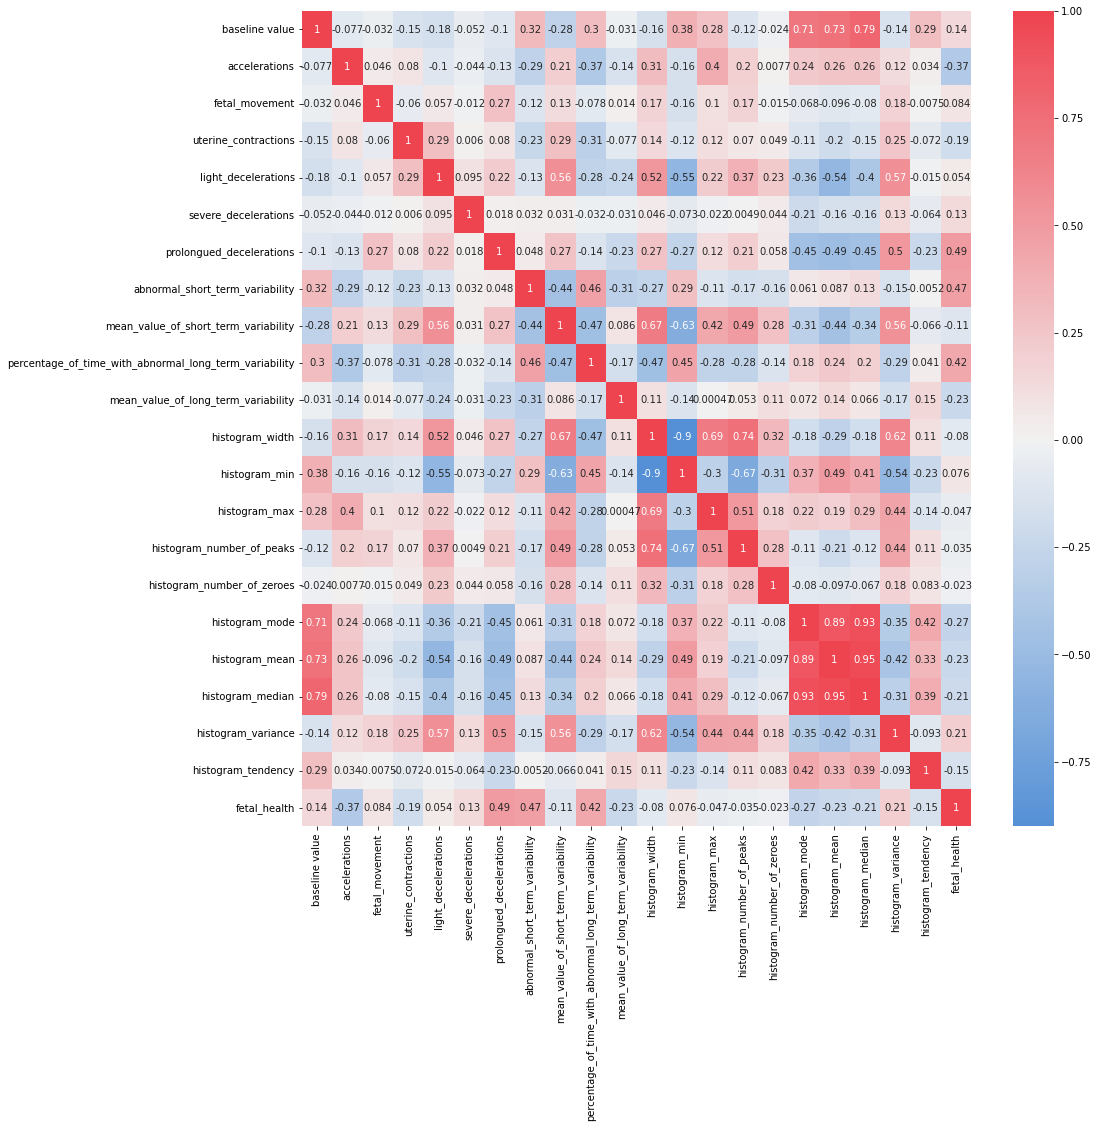

In [20]:
plt.figure(figsize=(15,15))
cmap = sns.diverging_palette(250,10, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(train_df.corr(),annot=True,cmap = cmap, center=0)
plt.show()

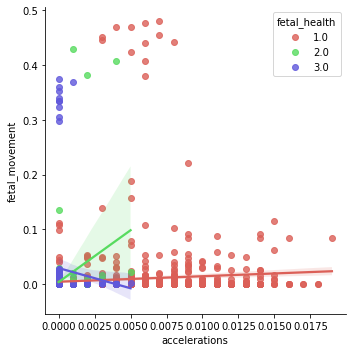

In [21]:
sns.lmplot(data = train_df, x = "accelerations", y = "fetal_movement", palette = 'hls', hue = "fetal_health", legend_out = False)
plt.show()

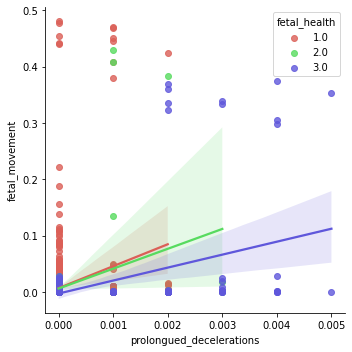

In [22]:
sns.lmplot(data = train_df, x = "prolongued_decelerations", y = "fetal_movement", palette = "hls", hue = "fetal_health", legend_out = False)
plt.show()

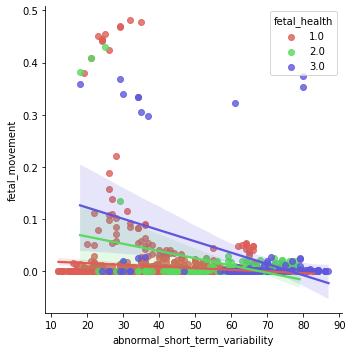

In [23]:
sns.lmplot(data = train_df, x = "abnormal_short_term_variability", y = "fetal_movement", palette = "hls", hue = "fetal_health", legend_out = False)
plt.show()

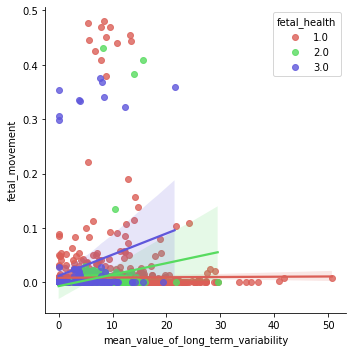

In [24]:
sns.lmplot(data = train_df, x = "mean_value_of_long_term_variability", y = "fetal_movement", palette = "hls", hue = "fetal_health", legend_out = False)
plt.show()

## Model building

In [25]:
x = train_df.drop(['fetal_health'],axis=1)
y = train_df['fetal_health']

In [26]:
print(x.shape)
print(y.shape)

(1693, 21)
(1693,)


In [27]:
column_names = list(x.columns)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_df = pd.DataFrame(x_scaled, columns = column_names)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y, test_size = 0.2, random_state = 42)

In [29]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1354, 21)
(1354,)
(339, 21)
(339,)


In [30]:
pipeline_lr = Pipeline([('lr_classifier', LogisticRegression(random_state= 42))])
pipeline_dt = Pipeline([('dt_classifier', DecisionTreeClassifier(random_state= 42))])
pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier())])
pipeline_svc = Pipeline([('sv_classifier', SVC())])
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]
pipe_dict = {0:'Logistic Regression', 1:'Decision Tree', 2:'Random Forest', 3:'SVC'}

In [31]:
for pipe in pipelines:
    pipe.fit(x_train, y_train)

## Cross validation score

In [32]:
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, x_train, y_train, cv = 10)
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Logistic Regression: 0.880381 
Decision Tree: 0.923932 
Random Forest: 0.932048 
SVC: 0.892941 


#### As seen above the cross validation score of random forest is high.so selecting random forest for model prediction

In [33]:
pred_rfc = pipeline_rf.predict(x_test)

In [34]:
print("Classification Report for classifier %s:\n%s\n" % (pipeline_rf, metrics.classification_report(y_test, pred_rfc)))

Classification Report for classifier Pipeline(steps=[('rf_classifier', RandomForestClassifier())]):
              precision    recall  f1-score   support

         1.0       0.93      0.99      0.96       263
         2.0       0.93      0.58      0.72        48
         3.0       0.89      0.86      0.87        28

    accuracy                           0.92       339
   macro avg       0.92      0.81      0.85       339
weighted avg       0.92      0.92      0.92       339




#### confusion matrix and accuracy

In [35]:
matrix = confusion_matrix(y_test, pred_rfc)
print('Confusion Matrix : \n', matrix)

Confusion Matrix : 
 [[261   1   1]
 [ 18  28   2]
 [  3   1  24]]


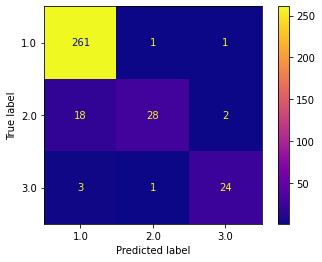

In [36]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipeline_rf, x_test, y_test,cmap="plasma")  
plt.show()

In [37]:
print("Accuracy"+str(accuracy_score(y_test,pred_rfc)))

Accuracy0.9233038348082596


### Saving Model prediction

In [38]:
pred_rfc

array([1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1.,
       1., 3., 1., 1., 1., 2., 1., 1., 3., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 3., 1., 1., 1., 1., 2., 1., 3., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 3., 1., 1., 2., 1., 1., 1., 1., 1., 2., 3., 3., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
       3., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 2., 1., 2., 1.,
       1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 3., 1., 1., 1., 3., 1., 3., 3.,
       1., 2., 1., 1., 3., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [39]:
df = pd.DataFrame(pred_rfc,columns =['fetal_health'])

In [40]:
df.head()

,fetal_health
0,1.0
1,1.0
2,1.0
3,2.0
4,1.0


In [41]:
df.to_csv('output.csv',header=df.columns,index=False)


In [42]:
dfg=pd.read_csv("output.csv")
dfg.head()

,fetal_health
0,1.0
1,1.0
2,1.0
3,2.0
4,1.0


In [43]:
dfg.shape

(339, 1)